## __Objective:__ Create a multiclass image classifier

## __Purpose:__ Can be used to classify  species of animal

### Use transfer learning and vgg16 model

### importing necessary libraries

In [34]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras import optimizers
from keras.utils import img_to_array, load_img
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

Loading up our image datasets

In [35]:
#Default dimensions we found online
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model_inceptionv3.h5' 

# loading up our datasets
train_data_dir = 'data/train'  
validation_data_dir = 'data/validation'  
test_data_dir = 'data/test'
   
# number of epochs to train top model  
epochs = 7 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

In [36]:
#Loading vgc16 model
vgg16 = applications.InceptionV3(include_top=False, weights='imagenet') 

In [37]:
datagen = ImageDataGenerator(rescale=1. / 255)  # needed to create the bottleneck .npy files

# Creation of weights/features with VGG16

In [38]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train_inc.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1517 images belonging to 20 classes.


C:\Users\Bhuvan.L.Poojari\AppData\Local\Temp\ipykernel_13344\204176735.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


Time:  0:00:57.100620


In [39]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [40]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation_inc.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 20 classes.


C:\Users\Bhuvan.L.Poojari\AppData\Local\Temp\ipykernel_13344\595622381.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(


Time:  0:00:06.727494


In [41]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [42]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test_inc.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 164 images belonging to 20 classes.


C:\Users\Bhuvan.L.Poojari\AppData\Local\Temp\ipykernel_13344\2354746286.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_test = vgg16.predict_generator(


Time:  0:00:06.914481


# Loading training, validation and testing data

In [43]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train_inc.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 1517 images belonging to 20 classes.


In [44]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation_inc.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 164 images belonging to 20 classes.


In [45]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test_inc.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 164 images belonging to 20 classes.


# Training of model

In [46]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

c:\Users\Bhuvan.L.Poojari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/7
31/31 [==============================] - 2s 43ms/step - loss: 1.8189 - acc: 0.5063 - val_loss: 0.5182 - val_acc: 0.8720
Epoch 2/7
31/31 [==============================] - 1s 35ms/step - loss: 0.5200 - acc: 0.8556 - val_loss: 0.4322 - val_acc: 0.9146
Epoch 3/7
31/31 [==============================] - 1s 37ms/step - loss: 0.3532 - acc: 0.8873 - val_loss: 0.3966 - val_acc: 0.9085
Epoch 4/7
31/31 [==============================] - 1s 38ms/step - loss: 0.2488 - acc: 0.9209 - val_loss: 0.4918 - val_acc: 0.9024
Epoch 5/7
31/31 [==============================] - 1s 36ms/step - loss: 0.2466 - acc: 0.9249 - val_loss: 0.4098 - val_acc: 0.9207
Epoch 6/7
31/31 [==============================] - 1s 36ms/step - loss: 0.1813 - acc: 0.9453 - val_loss: 0.3810 - val_acc: 0.9207
Epoch 7/7
4/4 [==============================] - 0s 14ms/step - loss: 0.5004 - acc: 0.9146
[INFO] accuracy: 91.46%
[INFO] Loss: 0.5003960132598877
Time:  0:00:09.217024


In [47]:
filepath = 'model_save_inceptionv3.h5'
keras.models.save_model(model, filepath)

In [48]:
model.save('saveinceptionv3.h5')

In [49]:
#Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               5120100   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
Total params: 5,126,170
Trainable params: 5,126,170
No

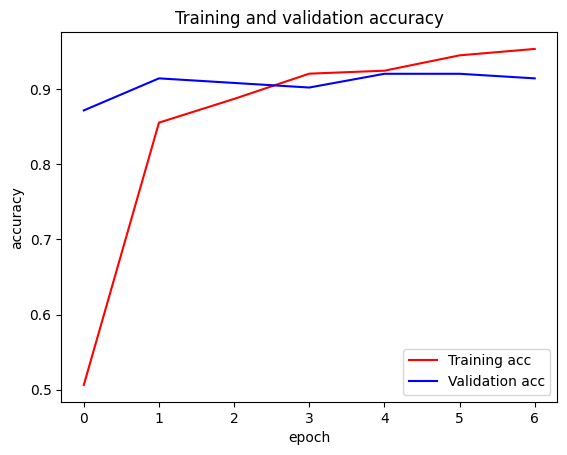

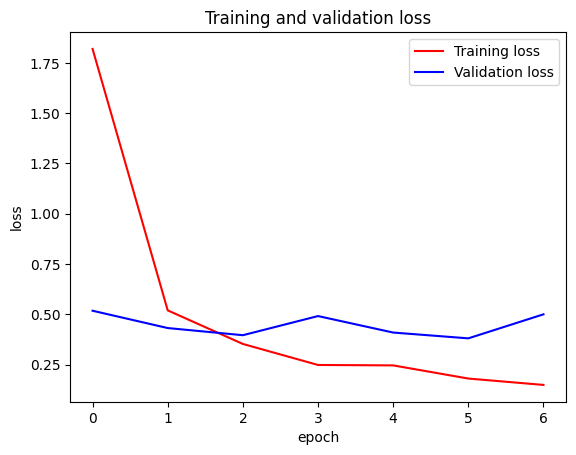

In [50]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## Model Evaluation on Testing Set

In [51]:
model.evaluate(test_data, test_labels)

6/6 [==============================] - 0s 7ms/step - loss: 0.2058 - acc: 0.9512


[0.20578578114509583, 0.9512194991111755]

## Classification metrics and Confusion Matrix

### Classification Metrics

In [52]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.99440742e-01 0.00000000e+00]
   [9.46251631e-01 9.47772861e-01 0.00000000e+00 ... 0.00000000e+00
    1.19694546e-01 0.00000000e+00]
   [1.47231042e-01 2.34476596e-01 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [3.14235598e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [3.37126166e-01 0.00000000e+00 5.41816950e-01 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [1.98641169e+00 1.45541418e+00 5.57500005e-01 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [7.22273707e-01 7.42253423e-01 2.29556292e-01 ... 0.000000

In [53]:
animals = ['bear', 'cougar', 'coyote', 'cow', 'crocodiles', 'deer', 'elephant', 'giraffe', 'goat',
           'gorilla', 'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'penguin', 'sheep', 'skunk', 'tiger', 'zebra']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

        bear       1.00      1.00      1.00        10
      cougar       1.00      0.70      0.82        10
      coyote       0.91      1.00      0.95        10
         cow       1.00      1.00      1.00        10
  crocodiles       0.91      1.00      0.95        10
        deer       0.80      0.80      0.80        10
    elephant       1.00      1.00      1.00        10
     giraffe       1.00      1.00      1.00         6
        goat       1.00      0.78      0.88         9
     gorilla       1.00      1.00      1.00         6
       horse       0.90      0.90      0.90        10
    kangaroo       1.00      0.86      0.92         7
     leopard       1.00      1.00      1.00        10
        lion       1.00      1.00      1.00         9
       panda       1.00      1.00      1.00         8
     penguin       1.00      1.00      1.00         5
       sheep       1.00      0.80      0.89         5
       skunk       1.00    

c:\Users\Bhuvan.L.Poojari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [54]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [55]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(10, 8)):  # Adjust the figsize as per your preference
    # Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Set figure size
    plt.figure(figsize=figsize)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    # Rotate x-labels by 90 degrees
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Increase x-coordinate for more horizontal space
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


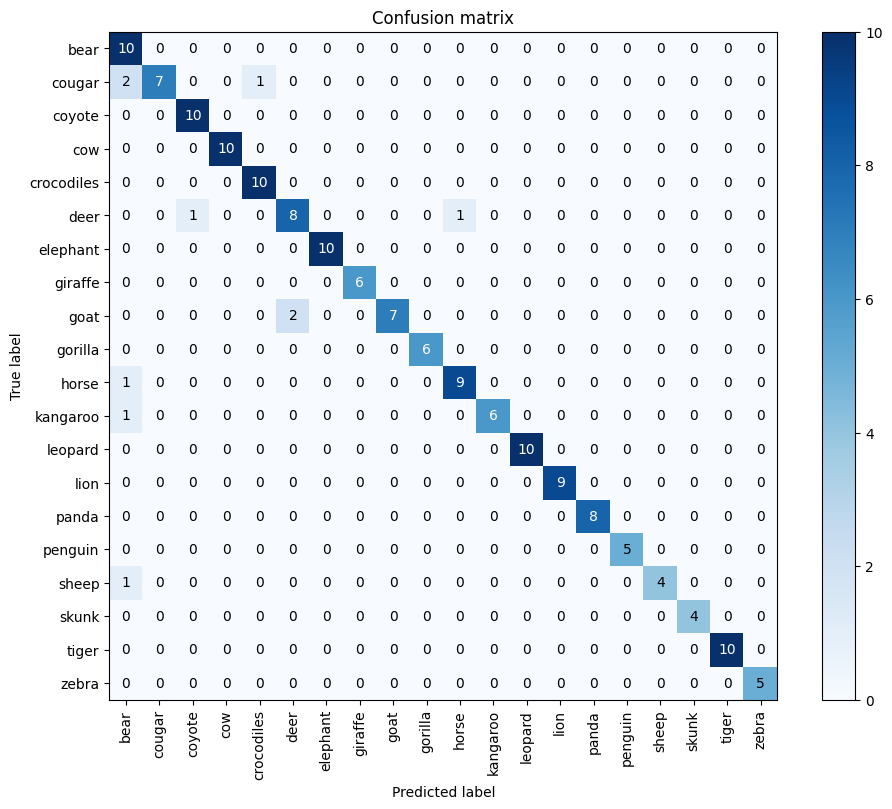

In [57]:
plot_confusion_matrix(confusion_matrix, ['bear', 'cougar', 'coyote', 'cow', 'crocodiles', 'deer', 'elephant', 'giraffe',
                      'goat', 'gorilla', 'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'penguin', 'sheep', 'skunk', 'tiger', 'zebra'])

Normalized confusion matrix


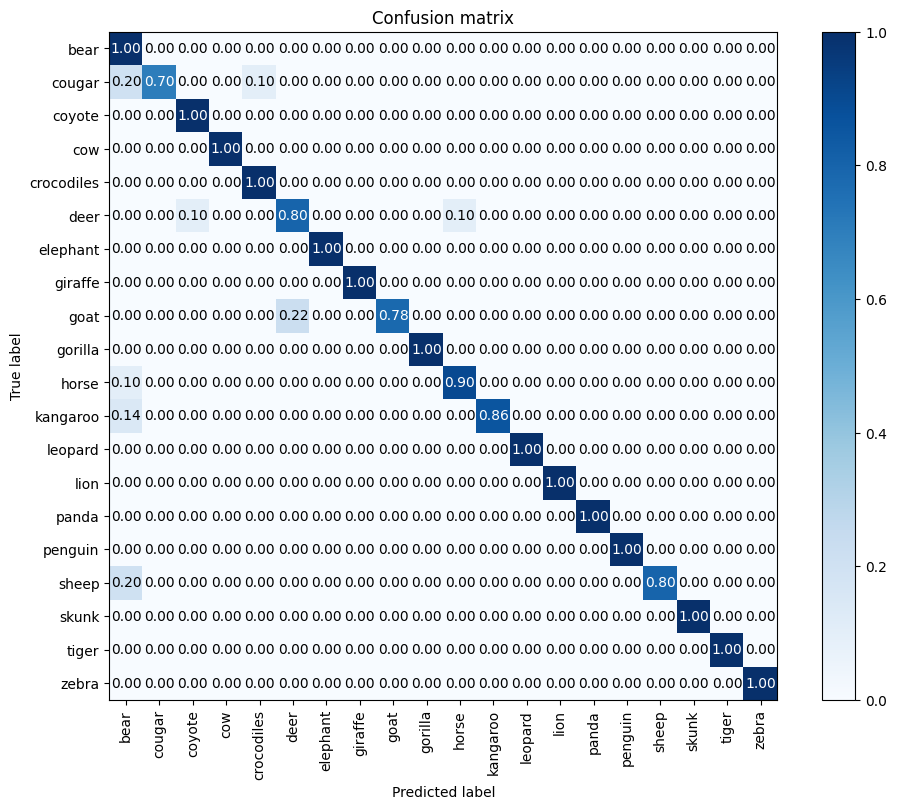

In [58]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix, 
                      ['bear', 'cougar', 'coyote', 'cow', 'crocodiles', 'deer', 'elephant', 'giraffe', 'goat', 'gorilla',
                          'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'penguin', 'sheep', 'skunk', 'tiger', 'zebra'],
                     normalize=True)

## Testing images on model

In [59]:
#model.load_weights(top_model_weights_path)

In [60]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [61]:
def test_single_image(path):
    animals = ['bear', 'cougar', 'coyote', 'cow', 'crocodiles', 'deer', 'elephant', 'giraffe', 'goat',
               'gorilla', 'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'penguin', 'sheep', 'skunk', 'tiger', 'zebra']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)
    preds = model.predict(bt_prediction)
    #print("BT ",bt_prediction)
    for idx, animal, x in zip(range(0, 20), animals, preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100, 2)))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict(bt_prediction)
    class_dictionary = generator_top.class_indices
    #print("class_dictionary ",class_dictionary)
    inv_map = {v: k for k, v in class_dictionary.items()}
    #print("inv_map ",inv_map)
    class_prob = list(class_predicted[0])
    #print(class_prob)
    max_prob = max(class_prob)
    #print(max_prob)
    pred_class = class_prob.index(max_prob)
    #print(pred_class)
    print("ID: {}, Label: {}".format(class_dictionary[inv_map[pred_class]], inv_map[pred_class]))
    return load_img(path)

In [67]:
path = 'data\\test\\bear\\1_99.jpg'

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 439ms/step
ID: 0, Label: bear 100.0%
ID: 1, Label: cougar 0.0%
ID: 2, Label: coyote 0.0%
ID: 3, Label: cow 0.0%
ID: 4, Label: crocodiles 0.0%
ID: 5, Label: deer 0.0%
ID: 6, Label: elephant 0.0%
ID: 7, Label: giraffe 0.0%
ID: 8, Label: goat 0.0%
ID: 9, Label: gorilla 0.0%
ID: 10, Label: horse 0.0%
ID: 11, Label: kangaroo 0.0%
ID: 12, Label: leopard 0.0%
ID: 13, Label: lion 0.0%
ID: 14, Label: panda 0.0%
ID: 15, Label: penguin 0.0%
ID: 16, Label: sheep 0.0%
ID: 17, Label: skunk 0.0%
ID: 18, Label: tiger 0.0%
ID: 19, Label: zebra 0.0%
Final Decision:
.
..
...
1/1 [==============================] - 0s 44ms/step
ID: 0, Label: bear


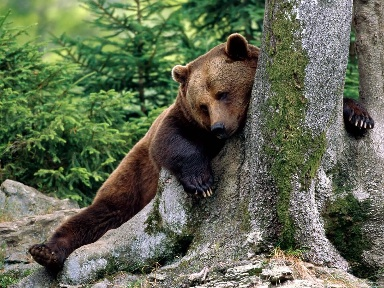

In [68]:
test_single_image(path)

In [64]:
# Compute precision, recall, F1 score
precision = metrics.precision_score(
    np.argmax(test_labels, axis=1), np.argmax(preds, axis=1), average='weighted')
recall = metrics.recall_score(
    np.argmax(test_labels, axis=1), np.argmax(preds, axis=1), average='weighted')
f1_score = metrics.f1_score(np.argmax(test_labels, axis=1), np.argmax(
    preds, axis=1), average='weighted')

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(
    np.argmax(test_labels, axis=1), np.argmax(preds, axis=1))

# Calculate FAR and FRR
far = np.sum(conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / \
    np.sum(conf_matrix.sum(axis=1))
frr = np.sum(conf_matrix.sum(axis=1) - np.diag(conf_matrix)) / \
    np.sum(conf_matrix.sum(axis=1))

# Print out the results
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))
print("False Acceptance Rate (FAR): {:.2f}".format(far))
print("False Rejection Rate (FRR): {:.2f}".format(frr))

# Calculate mAP
average_precision = metrics.average_precision_score(
    test_labels, preds, average=None)
mAP = np.mean(average_precision)
print("Mean Average Precision (mAP): {:.2f}".format(mAP))

Accuracy: 91.46%
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
False Acceptance Rate (FAR): 0.06
False Rejection Rate (FRR): 0.06
Mean Average Precision (mAP): 0.92


In [65]:
from keras.models import load_model
model = load_model('model_save_inceptionv3.h5')

In [66]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, F1 score per class
num_classes = test_labels.shape[1]  # Assuming one-hot encoded labels

precision = np.zeros(num_classes)
recall = np.zeros(num_classes)
f1 = np.zeros(num_classes)

for class_idx in range(num_classes):
  # Get true labels and predictions for the specific class
  true_labels = test_labels[:, class_idx]
  # Assuming threshold for binary classification
  predicted_labels = preds[:, class_idx] > 0.5

  # Calculate metrics for the class
  precision[class_idx] = precision_score(true_labels, predicted_labels)
  recall[class_idx] = recall_score(true_labels, predicted_labels)
  f1[class_idx] = f1_score(true_labels, predicted_labels)

# Print results per class (loop or DataFrame)
print("Class Name | Precision | Recall | F1 Score")
print("----------- | -------- | -------- | --------")
# You can replace with your actual class names
for class_idx in range(num_classes):
  print(
      f"Class {class_idx} | {precision[class_idx]:.2f} | {recall[class_idx]:.2f} | {f1[class_idx]:.2f}")

# Alternatively, use pandas for a DataFrame
class_names = ['bear', 'cougar', 'coyote', 'cow', 'crocodiles', 'deer', 'elephant', 'giraffe', 'goat',
               'gorilla', 'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'penguin', 'sheep', 'skunk', 'tiger', 'zebra']  # Replace with actual names
df = pd.DataFrame({"Class": class_names, "Precision": precision,
                  "Recall": recall, "F1 Score": f1})
print(df.to_string())

Class Name | Precision | Recall | F1 Score
----------- | -------- | -------- | --------
Class 0 | 1.00 | 1.00 | 1.00
Class 1 | 1.00 | 0.70 | 0.82
Class 2 | 0.91 | 1.00 | 0.95
Class 3 | 1.00 | 1.00 | 1.00
Class 4 | 0.91 | 1.00 | 0.95
Class 5 | 0.80 | 0.80 | 0.80
Class 6 | 1.00 | 1.00 | 1.00
Class 7 | 1.00 | 1.00 | 1.00
Class 8 | 1.00 | 0.78 | 0.88
Class 9 | 1.00 | 1.00 | 1.00
Class 10 | 0.90 | 0.90 | 0.90
Class 11 | 1.00 | 0.86 | 0.92
Class 12 | 1.00 | 1.00 | 1.00
Class 13 | 1.00 | 1.00 | 1.00
Class 14 | 1.00 | 1.00 | 1.00
Class 15 | 1.00 | 1.00 | 1.00
Class 16 | 1.00 | 0.80 | 0.89
Class 17 | 1.00 | 1.00 | 1.00
Class 18 | 1.00 | 1.00 | 1.00
Class 19 | 1.00 | 1.00 | 1.00
         Class  Precision    Recall  F1 Score
0         bear   1.000000  1.000000  1.000000
1       cougar   1.000000  0.700000  0.823529
2       coyote   0.909091  1.000000  0.952381
3          cow   1.000000  1.000000  1.000000
4   crocodiles   0.909091  1.000000  0.952381
5         deer   0.800000  0.800000  0.800000
